In [1]:
import pandas as pd
import numpy as np
import xlrd

Do odczytu plików xlsx __należy__ zainstalować dodatkowy pakiet **xlrd**
Polecenie 

In [2]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


Lub dla Anacondy

In [3]:
!conda install --yes xlrd

/usr/bin/sh: conda: nie znaleziono polecenia


Ponówmy import bibliotek i odczytajmy plik przestępstwa.

In [4]:
crimes = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx")
crimes

,"Przestępstwa ogółem wg jednostek podziału administracyjnego kraju - przestępstwa stwierdzone, przestępstwa wykryte, % wykrycia.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Jednostka podziału administracyjnego,Rok,Przestępstwa stwierdzone,Przestępstwa wykryte,% wykrycia
2,Polska,2018,768049,567775,73.3783
3,Polska,2017,753963,545008,71.7
4,Polska,2016,748459,501877,66.4854
...,...,...,...,...,...
380,teren działania KSP Warszawa,2000,117703,29671,25.2
381,teren działania KSP Warszawa,1999,90275,14501,16.1
382,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN


Odczytał nam pierwszy arkusz "ogółem". Aby poprawnie wyznaczyć obszar odczytu i określić z którego arkusza odczytujemy dane posłużmy się następującym poleceniem.

In [5]:
crimes = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="ogółem", header=2, nrows=380)
crimes

,Jednostka podziału administracyjnego,Rok,Przestępstwa stwierdzone,Przestępstwa wykryte,% wykrycia
0,Polska,2018,768049,567775,73.378319
1,Polska,2017,753963,545008,71.700000
2,Polska,2016,748459,501877,66.485357
3,Polska,2015,799779,524380,64.720134
4,Polska,2014,867855,573824,65.179275
...,...,...,...,...,...
375,teren działania KSP Warszawa,2003,128891,44931,34.700000
376,teren działania KSP Warszawa,2002,125604,43299,34.400000
377,teren działania KSP Warszawa,2001,121876,38414,31.400000
378,teren działania KSP Warszawa,2000,117703,29671,25.200000


sheet_name - nazwa arkusza, można też za pomocą numeru arkusza, w tym przypadku *sheet_name=1*

header - w którym wierszu jest nagłówek 

nrows - ilość wierszy, które chcemy odczytać jako dane, ostatnie 3 wiersze usunęliśmy

## Atrybuty

In [6]:
columns = crimes.columns
index = crimes.index
data = crimes.to_numpy()

In [7]:
columns

Index(['Jednostka podziału administracyjnego', 'Rok',
       'Przestępstwa stwierdzone', 'Przestępstwa wykryte', '% wykrycia'],
      dtype='object')

In [8]:
index

RangeIndex(start=0, stop=380, step=1)

In [9]:
data

array([['Polska', 2018, 768049, 567775, 73.3783187866211],
       ['Polska', 2017, 753963, 545008, 71.7],
       ['Polska', 2016, 748459, 501877, 66.485356535378],
       ...,
       ['teren działania KSP Warszawa', 2001, 121876, 38414, 31.4],
       ['teren działania KSP Warszawa', 2000, 117703, 29671, 25.2],
       ['teren działania KSP Warszawa', 1999, 90275, 14501, 16.1]],
      dtype=object)

In [10]:
crimes.dtypes

Jednostka podziału administracyjnego     object
Rok                                       int64
Przestępstwa stwierdzone                  int64
Przestępstwa wykryte                      int64
% wykrycia                              float64
dtype: object

In [11]:
crimes.dtypes.value_counts()

int64      3
float64    1
object     1
dtype: int64

In [12]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Jednostka podziału administracyjnego  380 non-null    object 
 1   Rok                                   380 non-null    int64  
 2   Przestępstwa stwierdzone              380 non-null    int64  
 3   Przestępstwa wykryte                  380 non-null    int64  
 4   % wykrycia                            380 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.0+ KB


Na wszystkie 380 wierszy, wszytkie kolumny są wypełnione.

## Wartości

In [13]:
crimes.Rok

0      2018
1      2017
2      2016
3      2015
4      2014
       ... 
375    2003
376    2002
377    2001
378    2000
379    1999
Name: Rok, Length: 380, dtype: int64

In [14]:
crimes.Rok.value_counts()

2018    19
2017    19
2000    19
2001    19
2002    19
2003    19
2004    19
2005    19
2006    19
2007    19
2008    19
2009    19
2010    19
2011    19
2012    19
2013    19
2014    19
2015    19
2016    19
1999    19
Name: Rok, dtype: int64

In [15]:
crimes['Przestępstwa stwierdzone']

0      768049
1      753963
2      748459
3      799779
4      867855
        ...  
375    128891
376    125604
377    121876
378    117703
379     90275
Name: Przestępstwa stwierdzone, Length: 380, dtype: int64

In [16]:
crimes['Przestępstwa stwierdzone'].min()

16460

In [17]:
crimes['Przestępstwa stwierdzone'].max()

1466643

In [18]:
crimes['Przestępstwa stwierdzone'].mean()

126941.59210526316

In [19]:
crimes['Przestępstwa stwierdzone'].median()

64688.5

In [20]:
crimes['Przestępstwa stwierdzone'].describe()

count    3.800000e+02
mean     1.269416e+05
std      2.457124e+05
min      1.646000e+04
25%      3.869950e+04
50%      6.468850e+04
75%      1.042780e+05
max      1.466643e+06
Name: Przestępstwa stwierdzone, dtype: float64

## Wykresy

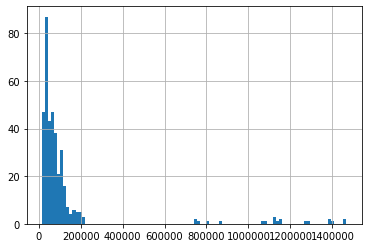

In [21]:
crimes['Przestępstwa stwierdzone'].hist(bins=100)

In [22]:
crimes_in_Poland = crimes[crimes['Jednostka podziału administracyjnego']=="Polska"]

In [23]:
crimes_in_Poland

,Jednostka podziału administracyjnego,Rok,Przestępstwa stwierdzone,Przestępstwa wykryte,% wykrycia
0,Polska,2018,768049,567775,73.378319
1,Polska,2017,753963,545008,71.700000
2,Polska,2016,748459,501877,66.485357
3,Polska,2015,799779,524380,64.720134
4,Polska,2014,867855,573824,65.179275
5,Polska,2013,1061237,720510,66.993961
6,Polska,2012,1119803,769604,67.800000
7,Polska,2011,1159554,807064,68.700000
8,Polska,2010,1138523,783428,67.900000
9,Polska,2009,1129577,766075,67.100000


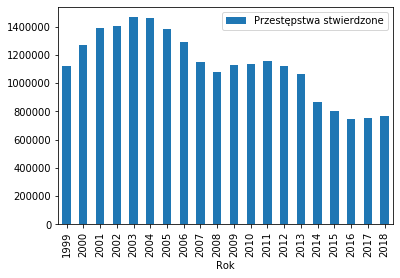

In [24]:
crimes_in_Poland.sort_values(by='Rok').plot(x='Rok', y='Przestępstwa stwierdzone', kind='bar')

W Polsce z roku na rok maleje ilość stwierdzonych przestępstw! Czyżby było ich mniej?

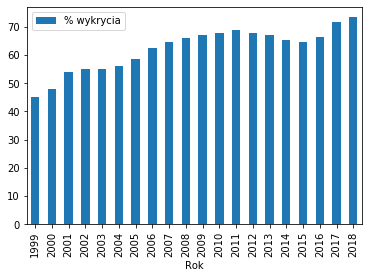

In [25]:
crimes_in_Poland.sort_values(by='Rok').plot(x='Rok', y='% wykrycia', kind='bar')

Ale wykrywalność wzrasta.

In [26]:
crimes[['Przestępstwa stwierdzone', 'Przestępstwa wykryte']]

,Przestępstwa stwierdzone,Przestępstwa wykryte
0,768049,567775
1,753963,545008
2,748459,501877
3,799779,524380
4,867855,573824
...,...,...
375,128891,44931
376,125604,43299
377,121876,38414
378,117703,29671


Pomimo, że posiadamy już % wykrycia przestępstw, obliczmy ponownie z posiadanych danych.

In [27]:
crimes['obliczony % wykrycia'] = 100.0*crimes['Przestępstwa wykryte'] / crimes['Przestępstwa stwierdzone']

In [28]:
crimes[['Przestępstwa stwierdzone', 'Przestępstwa wykryte', 'obliczony % wykrycia', '% wykrycia']]

,Przestępstwa stwierdzone,Przestępstwa wykryte,obliczony % wykrycia,% wykrycia
0,768049,567775,73.924320,73.378319
1,753963,545008,72.285775,71.700000
2,748459,501877,67.054708,66.485357
3,799779,524380,65.565613,64.720134
4,867855,573824,66.119801,65.179275
...,...,...,...,...
375,128891,44931,34.859688,34.700000
376,125604,43299,34.472628,34.400000
377,121876,38414,31.518921,31.400000
378,117703,29671,25.208363,25.200000


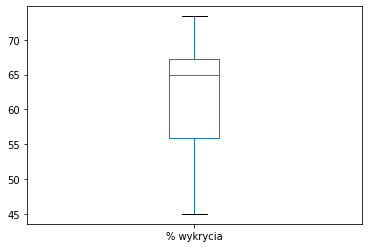

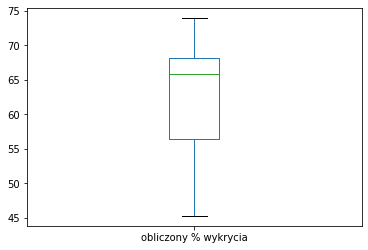

In [29]:
crimes_in_Poland = crimes[crimes['Jednostka podziału administracyjnego']=="Polska"]
crimes_in_Poland.plot(x='Rok', y='% wykrycia', kind='box')
crimes_in_Poland.plot(x='Rok', y='obliczony % wykrycia', kind='box')

Obliczone różnią się od tych podanych. W arkuszu na samym dole jest wyjaśnienie przestępstw stwierdzonych. Decyzja, z których procentów skorzystamy należy do nas. Wykorzystamy obliczone, usuwając kolumnę _% wykrycia_ podany z Excela.

In [30]:
del crimes['% wykrycia']

In [31]:
nowe_nazwy_kolumn = {
    'Jednostka podziału administracyjnego': 'podział', 
    'Rok' : 'rok',
    'Przestępstwa stwierdzone' : 'stwierdzone',
    'Przestępstwa wykryte' : 'wykryte',
    'obliczony % wykrycia' : '% wykrycia'
}
crimes = crimes.rename(columns = nowe_nazwy_kolumn)

In [32]:
crimes

,podział,rok,stwierdzone,wykryte,% wykrycia
0,Polska,2018,768049,567775,73.924320
1,Polska,2017,753963,545008,72.285775
2,Polska,2016,748459,501877,67.054708
3,Polska,2015,799779,524380,65.565613
4,Polska,2014,867855,573824,66.119801
...,...,...,...,...,...
375,teren działania KSP Warszawa,2003,128891,44931,34.859688
376,teren działania KSP Warszawa,2002,125604,43299,34.472628
377,teren działania KSP Warszawa,2001,121876,38414,31.518921
378,teren działania KSP Warszawa,2000,117703,29671,25.208363


In [33]:
crimes['podział'].value_counts()

woj. zachodniopomorskie                                20
woj. dolnośląskie                                      20
woj. lubuskie                                          20
woj. warmińsko-mazurskie                               20
woj. pomorskie                                         20
woj. wielkopolskie                                     20
teren działania KSP Warszawa                           20
Polska                                                 20
woj. świętokrzyskie                                    20
woj. małopolskie                                       20
woj. podkarpackie                                      20
woj. śląskie                                           20
woj. mazowieckie (KWP z/s w Radomiu i KSP Warszawa)    20
woj. lubelskie                                         20
woj. podlaskie                                         20
woj. łódzkie                                           20
woj. opolskie                                          20
woj. kujawsko-

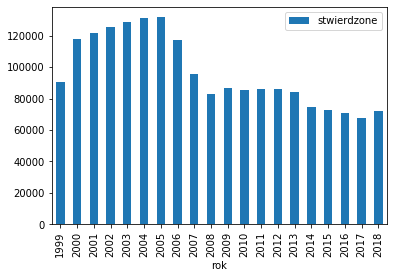

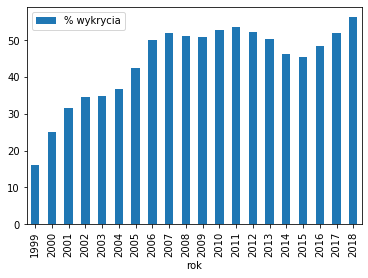

In [34]:
crimes_in_Warsaw = crimes[crimes['podział']=="teren działania KSP Warszawa"]
crimes_in_Warsaw.sort_values(by='rok').plot(x='rok', y='stwierdzone', kind='bar')
crimes_in_Warsaw.sort_values(by='rok').plot(x='rok', y='% wykrycia', kind='bar')

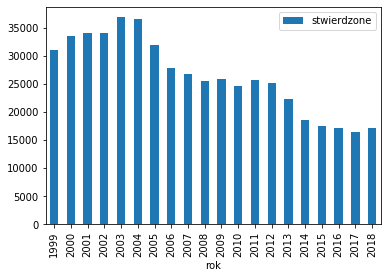

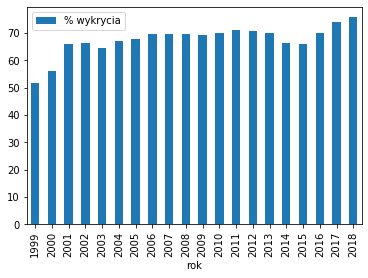

In [35]:
crimes_in_Podlasie = crimes[crimes['podział']=="woj. podlaskie"]
crimes_in_Podlasie.sort_values(by='rok').plot(x='rok', y='stwierdzone', kind='bar')
crimes_in_Podlasie.sort_values(by='rok').plot(x='rok', y='% wykrycia', kind='bar')

## Odczyt kilku arkuszy i złączenie w jeden

In [36]:
kryminalne = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="kryminalne", header=2, nrows=380)
siedemnascie = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="17x7", header=2, nrows=380)
bojka = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="bójka i pobicie", header=2, nrows=380)
kradziez = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="kradziez cudzej rzeczy", header=2, nrows=380)
samochod = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="kradzież samochodu", header=2, nrows=380)
wlamanie = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="kradzież z włamaniem", header=2, nrows=380)
rozboj = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="rozbój", header=2, nrows=380)
uszczerbek = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="uszczerbek", header=2, nrows=380)
uszkodzenie = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="uszkodzenie", header=2, nrows=380)
zabojstwo = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="zabójstwo", header=2, nrows=380)
zgwalcenie = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="zgwałcenie", header=2, nrows=380)
narkotyki = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="narkotyki", header=2, nrows=380)
gospodarcze = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="gospodarcze", header=2, nrows=380)
korupcja = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="korupcja", header=2, nrows=380)
drogowe = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="drogowe", header=2, nrows=380)
nietrzezwi = pd.read_excel("przestepstwa_stwierdzone_do_2018.xlsx", sheet_name="nietrzezwi", header=2, nrows=380)
nietrzezwi['Przestępstwa stwierdzone']=pd.to_numeric(nietrzezwi['Przestępstwa stwierdzone'], errors='coerce')
nietrzezwi['Przestępstwa wykryte']=pd.to_numeric(nietrzezwi['Przestępstwa wykryte'], errors='coerce')
nietrzezwi['% wykrycia']=pd.to_numeric(nietrzezwi['% wykrycia'], errors='coerce')

In [37]:
kryminalne.dtypes

Jednostka podziału administracyjnego     object
Rok                                       int64
Przestępstwa stwierdzone                  int64
Przestępstwa wykryte                      int64
% wykrycia                              float64
dtype: object

In [38]:
calosc = pd.DataFrame()

In [39]:
kryminalne['rodzaj'] = 'kryminalne'
bojka['rodzaj'] = 'bojka'
kradziez['rodzaj'] = 'kradziez'
samochod['rodzaj'] = 'samochod'
wlamanie['rodzaj'] = 'wlamanie'
rozboj['rodzaj'] = 'rozboj'
uszczerbek['rodzaj'] = 'uszczerbek'
uszkodzenie['rodzaj'] = 'uszkodzenie'
zabojstwo['rodzaj'] = 'zabojstwo'
zgwalcenie['rodzaj'] = 'zgwalcenie'
narkotyki['rodzaj'] = 'narkotyki'
gospodarcze['rodzaj'] = 'gospodarcze'
korupcja['rodzaj'] = 'korupcja'
drogowe['rodzaj'] = 'drogowe'
nietrzezwi['rodzaj'] = 'nietrzezwi'

In [40]:
calosc = calosc.append(kryminalne).append(bojka).append(kradziez).append(samochod).append(wlamanie).append(rozboj).append(uszczerbek).append(uszkodzenie).append(zabojstwo).append(zgwalcenie).append(narkotyki).append(gospodarcze).append(korupcja).append(drogowe).append(nietrzezwi)

In [41]:
nowe_nazwy_kolumn = {
    'Jednostka podziału administracyjnego': 'podział', 
    'Rok' : 'rok',
    'Przestępstwa stwierdzone' : 'stwierdzone',
    'Przestępstwa wykryte' : 'wykryte'
}
calosc = calosc.rename(columns = nowe_nazwy_kolumn)

In [42]:
calosc

,podział,rok,stwierdzone,wykryte,% wykrycia,rodzaj
0,Polska,2018,491732.0,319169.0,64.265274,kryminalne
1,Polska,2017,463907.0,281048.0,59.870000,kryminalne
2,Polska,2016,490328.0,272700.0,54.953742,kryminalne
3,Polska,2015,522546.0,275463.0,51.744231,kryminalne
4,Polska,2014,589147.0,317847.0,52.914971,kryminalne
...,...,...,...,...,...,...
375,teren działania KSP Warszawa,2003,6724.0,6727.0,100.000000,nietrzezwi
376,teren działania KSP Warszawa,2002,5404.0,5402.0,99.962990,nietrzezwi
377,teren działania KSP Warszawa,2001,4305.0,4305.0,100.000000,nietrzezwi
378,teren działania KSP Warszawa,2000,NaN,NaN,NaN,nietrzezwi


In [43]:
calosc.dtypes

podział         object
rok              int64
stwierdzone    float64
wykryte        float64
% wykrycia     float64
rodzaj          object
dtype: object

In [44]:
calosc['rodzaj'].value_counts()

wlamanie       380
gospodarcze    380
bojka          380
uszkodzenie    380
nietrzezwi     380
uszczerbek     380
zabojstwo      380
korupcja       380
rozboj         380
kradziez       380
zgwalcenie     380
narkotyki      380
drogowe        380
kryminalne     380
samochod       380
Name: rodzaj, dtype: int64

In [45]:
calosc_Polska = calosc[calosc['podział']=='Polska']

In [46]:
calosc_Polska.groupby(['rok','rodzaj'])['stwierdzone'].sum().unstack()

rodzaj,bojka,drogowe,gospodarcze,korupcja,kradziez,kryminalne,narkotyki,nietrzezwi,rozboj,samochod,uszczerbek,uszkodzenie,wlamanie,zabojstwo,zgwalcenie
rok,,,,,,,,,,,,,,,
1999,12756.0,20505.0,60393.0,1349.0,243537.0,1020654.0,15628.0,0.0,44775.0,71543.0,17849.0,48244.0,369235.0,1048.0,2029.0
2000,14363.0,19894.0,84260.0,1899.0,309846.0,1133162.0,19649.0,0.0,53533.0,68062.0,18429.0,56867.0,364786.0,1269.0,2399.0
2001,14369.0,138817.0,103521.0,2331.0,314820.0,1107073.0,29230.0,120113.0,49862.0,59458.0,16968.0,59823.0,325696.0,1325.0,2339.0
2002,14194.0,163012.0,109698.0,2408.0,314929.0,1083854.0,36178.0,144412.0,47808.0,53674.0,16775.0,64309.0,304625.0,1188.0,2345.0
2003,14010.0,168827.0,151596.0,3490.0,336143.0,1101387.0,47605.0,150901.0,51688.0,54291.0,15669.0,68175.0,294654.0,1039.0,2322.0
2004,14338.0,177296.0,152148.0,4279.0,339086.0,1085295.0,59356.0,158543.0,48636.0,51150.0,15814.0,70799.0,266591.0,980.0,2176.0
2005,13911.0,196486.0,136801.0,6127.0,324144.0,1000096.0,67560.0,178571.0,42150.0,45292.0,15047.0,65775.0,221020.0,837.0,1987.0
2006,14266.0,197712.0,145314.0,6520.0,280709.0,893389.0,70202.0,180955.0,35182.0,30529.0,14834.0,62776.0,173762.0,816.0,2001.0
2007,14327.0,168359.0,143108.0,9631.0,241104.0,794317.0,63007.0,150382.0,27637.0,21284.0,14848.0,67986.0,141606.0,848.0,1827.0


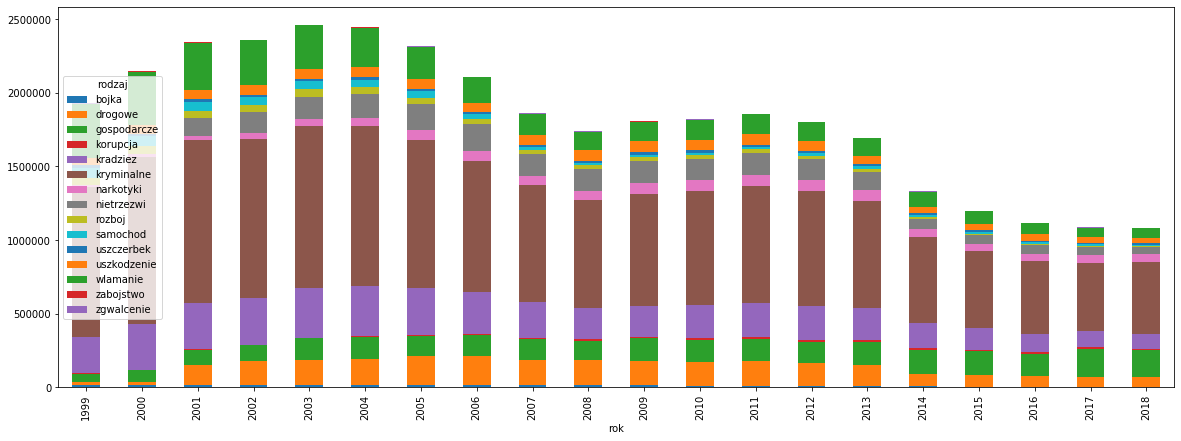

In [47]:
calosc_Polska.groupby(['rok','rodzaj'])['stwierdzone'].sum().unstack().plot(kind='bar', stacked=True, figsize=(20,7))